<a href="https://colab.research.google.com/github/sachsac/Predictions_of_Sales/blob/main/Project_1_Part_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning Steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/Coding Dojo/data set/sales_predictions.csv'
sales_predictions = pd.read_csv(filename)

In [2]:
#every grocery store is "small", Supermarkets can be anything. probably OK to delete this column as well
sales_predictions.drop(columns = ['Outlet_Size', 'Item_Weight'], inplace = True)
sales_predictions
sales_predictions.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [3]:
#Let's simplify, supermarket vs grocery
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type2', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket'
sales_predictions.value_counts('Outlet_Type')

Outlet_Type
Supermarket      7440
Grocery Store    1083
dtype: int64

In [4]:
#combining unique values into Lowfat vs Regular
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [18]:
grocery_store = sales_predictions[sales_predictions['Outlet_Type'] == 'Grocery Store']
supermarkets = sales_predictions[sales_predictions['Outlet_Type'] != 'Grocery Store']

# For Data Viz

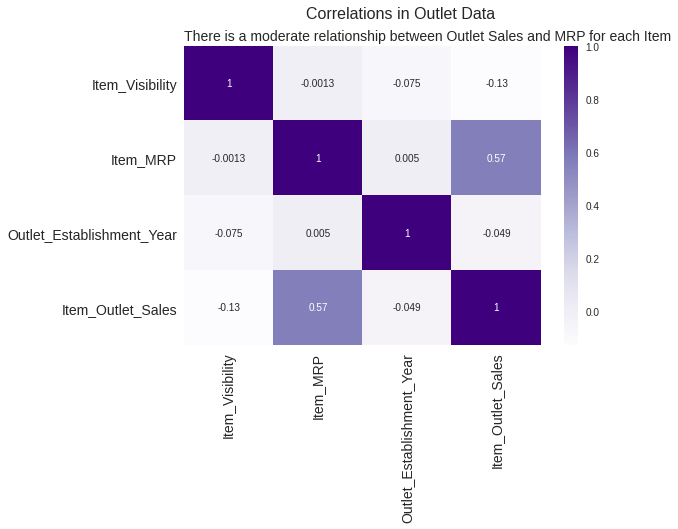

In [70]:
#heatmap first to indicate some relationships
corr = sales_predictions.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);
plt.suptitle('Correlations in Outlet Data', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('There is a moderate relationship between Outlet Sales and MRP for each Item', loc = 'left', fontsize = 14);

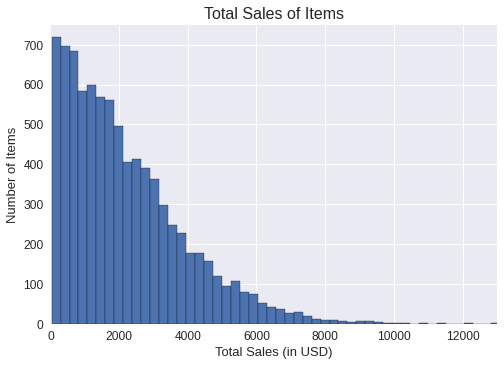

In [128]:
#item outlet sales histogram
plt.style.use('seaborn')
sales_predictions['Item_Outlet_Sales'].hist(bins = 50,
                                         edgecolor='black');
plt.xlabel('Total Sales (in USD)', fontsize = 13);
plt.xlim(0, 13000)
plt.ylim(0,750)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Total Sales of Items', fontsize = 16)
plt.ylabel('Number of Items', fontsize = 13);

In [21]:
sales_predictions['Item_MRP'].max()

266.8884

In [22]:
sales_predictions['Item_MRP'].min()

31.29

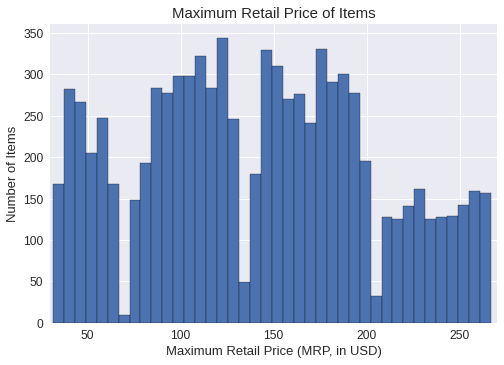

In [129]:
#MRPs histogram
plt.style.use('seaborn')
sales_predictions['Item_MRP'].hist(bins = 40,
                                         edgecolor='black');
plt.xlabel('Maximum Retail Price (MRP, in USD)', fontsize = 13)
plt.xlim(30, 270)
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
plt.title('Maximum Retail Price of Items', fontsize = 15)
plt.ylabel('Number of Items', fontsize = 13);

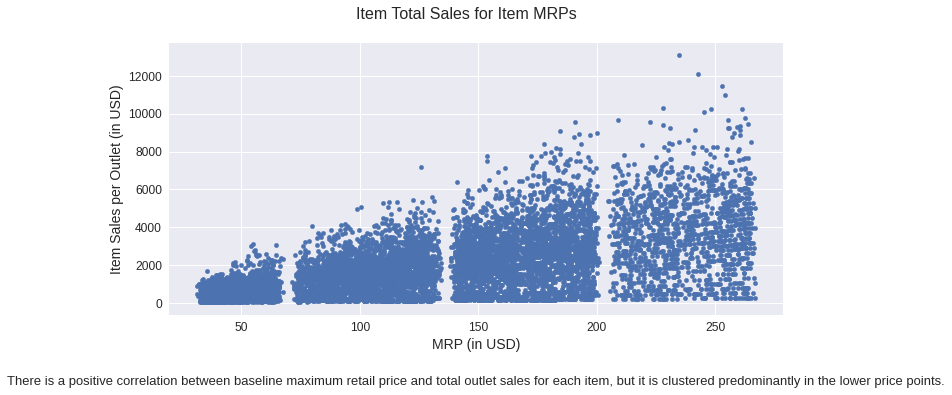

In [125]:
sales_predictions.plot.scatter(y = 'Item_Outlet_Sales', x = 'Item_MRP')
plt.rcParams["figure.figsize"] = (11,5)
plt.xticks(fontsize =12)
plt.yticks(fontsize=12)
plt.suptitle('Item Total Sales for Item MRPs', fontsize = 16)
plt.title('There is a positive correlation between baseline maximum retail price and total outlet sales for each item, but it is clustered predominantly in the lower price points.', fontsize = 13, y=-0.28, loc = 'center')
plt.ylabel('Item Sales per Outlet (in USD)', fontsize = 14)
plt.xlabel('MRP (in USD)', fontsize = 14);

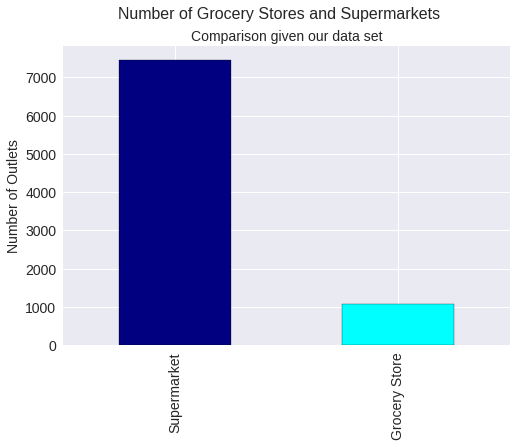

In [43]:
sales_predictions['Outlet_Type'].value_counts().plot(kind = 'bar',
                                                     color = ['navy', 'cyan'],
                                                     edgecolor = 'black',
                                                     fontsize = 14)
plt.title('Comparison given our data set', fontsize = 14)
plt.suptitle('Number of Grocery Stores and Supermarkets', fontsize = 16)
plt.ylabel('Number of Outlets', fontsize = 14);

In [60]:
grocery_store['Item_Outlet_Sales'].max()

1775.6886

In [62]:
grocery_store['Item_Outlet_Sales'].min()

33.29

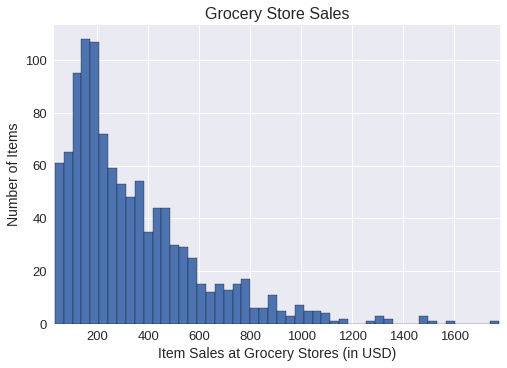

In [89]:
#Just Grocery
plt.style.use('seaborn')
grocery_store['Item_Outlet_Sales'].hist(bins = 50,
                                         edgecolor='black')
plt.title('Grocery Store Sales', fontsize = 16)
plt.xlabel('Item Sales at Grocery Stores (in USD)', fontsize = 14)
plt.xlim(30, 1780)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('Number of Items', fontsize = 14);

In [57]:
supermarkets['Item_Outlet_Sales'].max()

13086.9648

In [63]:
supermarkets['Item_Outlet_Sales'].min()

69.2432

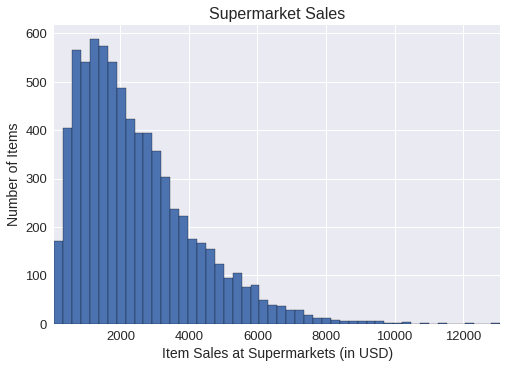

In [92]:
#Just Supermarkets
plt.style.use('seaborn')
supermarkets['Item_Outlet_Sales'].hist(bins = 50,
                                         edgecolor='black')
plt.xlabel('Item Sales at Supermarkets (in USD)', fontsize = 14)
plt.ylabel('Number of Items', fontsize = 14)
plt.yticks(fontsize =13)
plt.xticks(fontsize = 13)
plt.xlim(60,13087)
plt.title('Supermarket Sales', fontsize = 16);

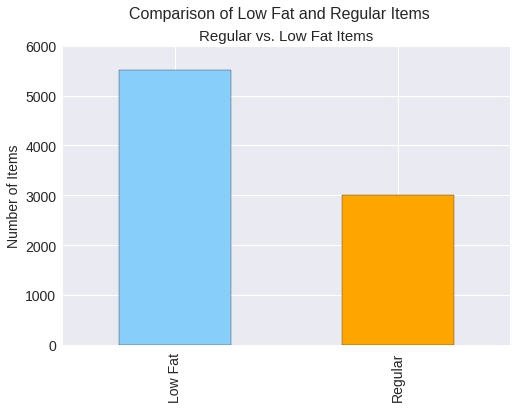

In [27]:
plt.suptitle('Comparison of Low Fat and Regular Items', fontsize = 16)
plt.title('Regular vs. Low Fat Items', fontsize = 15)
sales_predictions['Item_Fat_Content'].value_counts().plot(kind = 'bar',
                                                          color = ['lightskyblue', 'orange'],
                                                          edgecolor = 'black',
                                                          fontsize = 14)
plt.ylabel('Number of Items', fontsize = 14);
plt.ylim(0,6000);

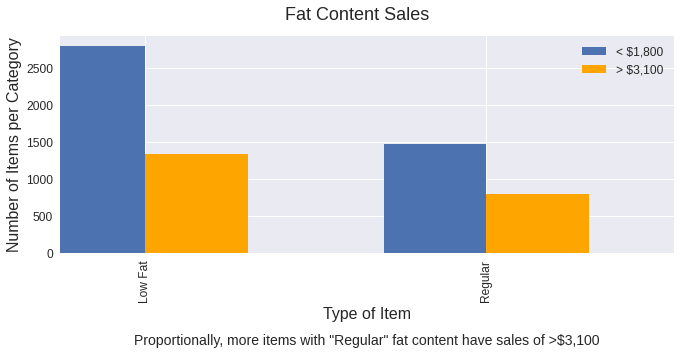

In [114]:
#median is about 1800 for item outlet sales, let's look if one is doing better.
sales_filter = sales_predictions.loc[:, 'Item_Outlet_Sales'] < 1800

width = 0.3
sales_predictions.loc[sales_filter, 'Item_Fat_Content'].value_counts().plot(kind ='bar', width=width, position=1, label = '< $1,800');
high_sales_filter = sales_predictions.loc[:, 'Item_Outlet_Sales'] > 3100
sales_predictions.loc[high_sales_filter, 'Item_Fat_Content'].value_counts().plot(kind ='bar', width=width, color = 'orange',position =0, label = '> $3,100');
plt.suptitle('Fat Content Sales', fontsize = 18)
plt.title('Proportionally, more items with "Regular" fat content have sales of >$3,100', y=-0.45, loc = 'center', fontsize = 14)
plt.legend(fontsize = 12)
plt.xlabel('Type of Item', fontsize = 16)
plt.ylabel('Number of Items per Category', fontsize = 16);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rcParams["figure.figsize"] = (11,4);

In [28]:
sales_predictions['Item_Outlet_Sales'].median()

1794.3310000000001

In [29]:
IQR_75 =np.percentile(sales_predictions['Item_Outlet_Sales'], [75])
IQR_75

array([3101.2964])

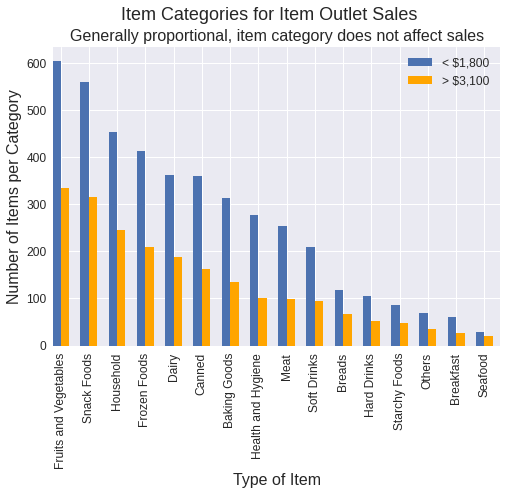

In [93]:
#median is about 1800 for item outlet sales, let's look at which categories aren't doing as well.
sales_filter = sales_predictions.loc[:, 'Item_Outlet_Sales'] < 1800
width = 0.3
sales_predictions.loc[sales_filter, 'Item_Type'].value_counts().plot(kind ='bar', width=width, position=1, label = '< $1,800');
high_sales_filter = sales_predictions.loc[:, 'Item_Outlet_Sales'] > 3100
sales_predictions.loc[high_sales_filter, 'Item_Type'].value_counts().plot(kind ='bar', width=width, color = 'orange',position =0, label = '> $3,100');
plt.suptitle('Item Categories for Item Outlet Sales', fontsize = 18)
plt.title('Generally proportional, item category does not affect sales', fontsize = 16)
plt.legend(fontsize = 12)
plt.xlabel('Type of Item', fontsize = 16)
plt.ylabel('Number of Items per Category', fontsize = 16);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rcParams["figure.figsize"] = (20,5);